In [1]:
print("all ok")

all ok


In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq

In [3]:
model=ChatGroq(model_name="deepseek-r1-distill-llama-70b")

In [4]:
model.invoke("What is the capital of India?")

AIMessage(content="<think>\nOkay, so I need to figure out what the capital of India is. Hmm, I'm not entirely sure, but I'll try to think through it. Let me start by recalling what I know about India. India is a country in South Asia, right? It's a pretty big country with a rich history. I remember learning that it's a republic and has a parliamentary system of government.\n\nNow, capitals are the administrative centers where the government is located. So, the capital isn't necessarily the largest city or the most populous one, although sometimes they can be the same. I think in some countries, like Brazil, the capital is a city that's not the biggest, so maybe India is similar.\n\nWait, I think the capital of India is Delhi. But is that correct? I'm a bit confused because sometimes people talk about Mumbai as a major city. Mumbai is the financial hub, I believe, so it's a big city, but is it the capital? I don't think so. Then there's Bangalore, which is known for technology, and Kolk

In [6]:
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [51]:
@tool
def multiply(a:int,b:int)-> int:
    "this is a multiplication tool"
    return a*b

In [52]:
@tool
def search(query: str):
    """search the web for a query and return the results"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return f"Result for {query} is: \n{result}"

In [53]:
print(search.invoke({"query":"What is the capital of France?"}))

Result for What is the capital of France? is: 
[{'title': 'Paris facts: the capital of France in history', 'url': 'https://home.adelphi.edu/~ca19535/page%204.html', 'content': 'page 4\n\n===============\n\nHomeSpainSydneySan FranciscoParisLas VegasMaui\n\n Paris, France\n\nImage 1\n\nParis facts: Paris, the capital of France\n---------------------------------------------\n\nParis is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants).\n\nParis has 2.234 million inhabitants end 2011. She is the core of Ile de France region (12 million people). [...] Before Paris, the capital of France was Lyon (under the Romans). Paris first became the capital of France in 508 under King Clovis. After centuries with no unique capital of France, Paris retrieved its status of capital of France under King Philippe Auguste, who reigned between 1180 and 1223. You can see remains of the Philippe August Paris walls in the passageway between the Louvre parking and Lou

In [54]:
tools = [multiply, search]

In [55]:
tools

[StructuredTool(name='multiply', description='this is a multiplication tool', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000018B15736700>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000018B157379C0>)]

In [56]:
llm_with_tools=model.bind_tools(tools)

In [57]:
result=llm_with_tools.invoke("what is current gdp of india?")

In [58]:
result

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'jct33jkev', 'function': {'arguments': '{"query":"current GDP of India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 181, 'prompt_tokens': 175, 'total_tokens': 356, 'completion_time': 0.748038753, 'prompt_time': 0.011011166, 'queue_time': 0.068513916, 'total_time': 0.759049919}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--456aa51c-a97f-460f-8cb1-db703c50708e-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of India'}, 'id': 'jct33jkev', 'type': 'tool_call'}], usage_metadata={'input_tokens': 175, 'output_tokens': 181, 'total_tokens': 356})

In [59]:
result.content

''

In [60]:
result.tool_calls

[{'name': 'search',
  'args': {'query': 'current GDP of India'},
  'id': 'jct33jkev',
  'type': 'tool_call'}]

In [61]:
result.tool_calls[0]["name"]

'search'

In [62]:
result.tool_calls[0]["args"]

{'query': 'current GDP of India'}

In [63]:
type(result.tool_calls[0]["args"])

dict

In [64]:
tool_mapping={tool.name:tool for tool in tools}

In [65]:
tool_mapping

{'multiply': StructuredTool(name='multiply', description='this is a multiplication tool', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000018B15736700>),
 'search': StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000018B157379C0>)}

In [66]:
tool_mapping["search"]

StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000018B157379C0>)

In [67]:
tool_mapping[result.tool_calls[0]["name"]].invoke(result.tool_calls[0]["args"])

'Result for current GDP of India is: \n[{\'title\': \'World GDP Ranking 2025 List - ClearTax\', \'url\': \'https://cleartax.in/s/world-gdp-ranking-list\', \'content\': "India is currently ranked as the 4th largest economy globally in 2025, surpassing Japan to secure the 4th position among the world\'s top 10 largest economies, with a nominal GDP of $4.19 trillion in 2025. Moreover, the IMF forecasts that by 2027, India will overtake Germany to become the 3rd largest economy worldwide [...] With an estimated real GDP of Rs. 187.95 lakh crore in 2024-25, against the real GDP of Rs. 176.51 in 2023-24 generated by a population of over 1 billion, India is among the highest population-based economies in the world. Additionally, as per IMF projections, India\'s GDP grow is at 6.2% in 2024-25 and 2025-26.This means India\'s economic growth next fiscal year will be the fastest among major economies. Therefore, in the upcoming years, rising consumption and investments, both domestic and [...] ##

In [68]:
from typing import TypedDict,Sequence,Annotated

In [69]:
import operator

In [70]:
from langchain_core.messages import BaseMessage

In [71]:
class AgentState(TypedDict):
    """State for the Agent"""
    messages: Annotated[Sequence[BaseMessage],operator.add]

In [72]:
def invoke_model(state:AgentState):
    messages=state["messages"]
    question=messages[-1]
    response=llm_with_tools.invoke(question)
    return {"messages":[response]}

In [73]:
def invoke_tool(state:AgentState):
    tool_details=state["messages"][-1].tool_calls
    
    if tool_details is None:
        return Exception("No tool calls found in the last message.")
    
    print(f"Seleted tool: {tool_details[0]['name']}")
    
    if tool_details[0]["name"]=="search":
        response=input(prompt=f"[yes/no] do you want to continue with this expensive web search")
        if response.lower()=="no":
            print("web search discarded by the user. exiting gracefully")
            raise Exception("Web search discarded by the user.")
            
    
    response=tool_mapping[tool_details[0]["name"]].invoke(tool_details[0]["args"])
    return {"messages":[response]}
            

In [74]:
def router(state:AgentState):
    tool_calls=state["messages"][-1].tool_calls
    if len(tool_calls)>0:
        return "tool"
    else:
        return "end"

In [75]:
tools

[StructuredTool(name='multiply', description='this is a multiplication tool', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000018B15736700>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000018B157379C0>)]

In [76]:
from langgraph.graph import StateGraph,START,END

In [77]:
graph=StateGraph(AgentState)
graph.add_node("ai_assistant", invoke_model)
graph.add_node("tool", invoke_tool)
graph.add_conditional_edges("ai_assistant",
                            router,
                            {
                                "tool":"tool",
                                "end":END
                            }
                            )
graph.add_edge("tool", END)
graph.set_entry_point("ai_assistant")


In [78]:
app=graph.compile()

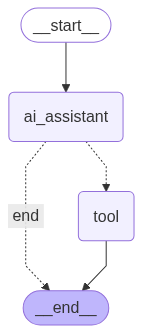

In [79]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [80]:
app.invoke({"messages":["What is the current gdp of the india?"]})

Seleted tool: search


{'messages': ['What is the current gdp of the india?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fcvabn2rb', 'function': {'arguments': '{"query":"current GDP of India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 102, 'prompt_tokens': 177, 'total_tokens': 279, 'completion_time': 0.418970539, 'prompt_time': 0.011106973, 'queue_time': 0.053741947000000005, 'total_time': 0.430077512}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1ddc0ba1-9255-41cb-bbbd-efc1a0100c32-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of India'}, 'id': 'fcvabn2rb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 177, 'output_tokens': 102, 'total_tokens': 279}),
  'Result for current GDP of India is: \n[{\'title\': \'Economic Development Monthly Report: Analysis of Indian Economy - IBEF\', \'url\': \'https://ww

In [81]:

app.invoke({"messages":["What is the multiplication of 5 and 20?"]})

Seleted tool: multiply


{'messages': ['What is the multiplication of 5 and 20?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3apav2ntn', 'function': {'arguments': '{"a":5,"b":20}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 285, 'prompt_tokens': 178, 'total_tokens': 463, 'completion_time': 1.164743037, 'prompt_time': 0.011124803, 'queue_time': 0.06696848899999999, 'total_time': 1.17586784}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7c424cd3-785d-405e-821c-ff81511e1445-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5, 'b': 20}, 'id': '3apav2ntn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 178, 'output_tokens': 285, 'total_tokens': 463}),
  100]}

In [106]:
def ai_assistant(state:AgentState):
    response=llm_with_tools.invoke(state["messages"])
    return {"messages":[response]}

In [107]:
from langgraph.checkpoint.memory import MemorySaver 

In [108]:
memory=MemorySaver()

In [109]:
from langgraph.prebuilt import ToolNode,tools_condition

In [110]:
tool_node=ToolNode(tools)

In [111]:
workflow=StateGraph(AgentState)

In [112]:
workflow.add_node("ai_assistant",ai_assistant)

In [113]:
workflow.add_node("tools",tool_node)

In [114]:
workflow.add_edge(START,"ai_assistant")

In [115]:
workflow.add_conditional_edges("ai_assistant",
                            tools_condition
                            )

In [116]:
workflow.add_edge("tools","ai_assistant")

In [117]:
app2=workflow.compile(checkpointer=memory,interrupt_before=["tools"])

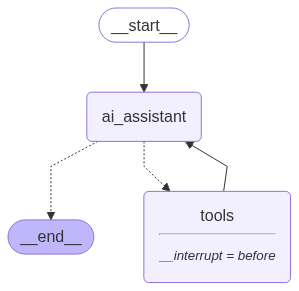

In [118]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [119]:
config={"configurable":{"thread_id":"1"}}

In [120]:
from langchain_core.messages import HumanMessage

In [121]:
response=app2.invoke({"messages":[HumanMessage("What is the gdp of China?")]},config=config)

In [122]:
response

{'messages': [HumanMessage(content='What is the gdp of China?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yf14v6vjb', 'function': {'arguments': '{"query":"China GDP"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 175, 'total_tokens': 264, 'completion_time': 0.438806541, 'prompt_time': 0.010988828, 'queue_time': 0.05636510200000001, 'total_time': 0.449795369}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b111cb14-7be5-4865-8de4-35462ffa0034-0', tool_calls=[{'name': 'search', 'args': {'query': 'China GDP'}, 'id': 'yf14v6vjb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 175, 'output_tokens': 89, 'total_tokens': 264})]}

In [123]:
snapshot=app2.get_state(config)

In [124]:
snapshot


StateSnapshot(values={'messages': [HumanMessage(content='What is the gdp of China?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yf14v6vjb', 'function': {'arguments': '{"query":"China GDP"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 175, 'total_tokens': 264, 'completion_time': 0.438806541, 'prompt_time': 0.010988828, 'queue_time': 0.05636510200000001, 'total_time': 0.449795369}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b111cb14-7be5-4865-8de4-35462ffa0034-0', tool_calls=[{'name': 'search', 'args': {'query': 'China GDP'}, 'id': 'yf14v6vjb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 175, 'output_tokens': 89, 'total_tokens': 264})]}, next=('tools',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f

In [125]:
snapshot.next

('tools',)

In [126]:
last_message=snapshot.values["messages"][-1]

In [127]:
last_message

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yf14v6vjb', 'function': {'arguments': '{"query":"China GDP"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 175, 'total_tokens': 264, 'completion_time': 0.438806541, 'prompt_time': 0.010988828, 'queue_time': 0.05636510200000001, 'total_time': 0.449795369}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b111cb14-7be5-4865-8de4-35462ffa0034-0', tool_calls=[{'name': 'search', 'args': {'query': 'China GDP'}, 'id': 'yf14v6vjb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 175, 'output_tokens': 89, 'total_tokens': 264})

In [128]:
app2.invoke(None,config) #none means resume the last state or resume the process

{'messages': [HumanMessage(content='What is the gdp of China?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yf14v6vjb', 'function': {'arguments': '{"query":"China GDP"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 175, 'total_tokens': 264, 'completion_time': 0.438806541, 'prompt_time': 0.010988828, 'queue_time': 0.05636510200000001, 'total_time': 0.449795369}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b111cb14-7be5-4865-8de4-35462ffa0034-0', tool_calls=[{'name': 'search', 'args': {'query': 'China GDP'}, 'id': 'yf14v6vjb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 175, 'output_tokens': 89, 'total_tokens': 264}),
  ToolMessage(content='Result for China GDP is: \n[{\'title\': \'China: GDP at current prices 1985-2030| Statista\', \'url

In [129]:
tool_details=last_message.tool_calls

In [130]:

tool_details

[{'name': 'search',
  'args': {'query': 'China GDP'},
  'id': 'yf14v6vjb',
  'type': 'tool_call'}]

In [131]:
tool_details[0]["name"]

'search'

In [134]:
if tool_details[0]["name"]== "search":
    user_input=input(prompt=f"[yes/no] do you want to continue with {tool_details[0]['name']}?").lower()
    if user_input=="no":
        print("web tool discarded")
        raise Exception("Web tool discarded by the user.")
    else:
        response=app2.invoke(None,config)
        print(response)
else:
    response=app2.invoke(None,config)
    print(response)
    

{'messages': [HumanMessage(content='What is the gdp of China?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yf14v6vjb', 'function': {'arguments': '{"query":"China GDP"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 175, 'total_tokens': 264, 'completion_time': 0.438806541, 'prompt_time': 0.010988828, 'queue_time': 0.05636510200000001, 'total_time': 0.449795369}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b111cb14-7be5-4865-8de4-35462ffa0034-0', tool_calls=[{'name': 'search', 'args': {'query': 'China GDP'}, 'id': 'yf14v6vjb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 175, 'output_tokens': 89, 'total_tokens': 264}), ToolMessage(content='Result for China GDP is: \n[{\'title\': \'China: GDP at current prices 1985-2030| Statista\', \'url\': 